In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
LS_DIR = []
ROOTS = [
    os.path.join("/home", "niche", "COLO"),
    os.path.join("/projects", "niche_squad", "COLO"),]
for root in ROOTS:
    DIR_OUT = os.path.join(root, "out", "b0313")
    LS_DIR += [os.path.join(DIR_OUT, f) for f in os.listdir(DIR_OUT) if "csv" not in f]
LS_DIR

['/home/niche/COLO/out/b0313/b_light',
 '/home/niche/COLO/out/b0313/a1_t2s',
 '/home/niche/COLO/out/b0313/a2_s2t',
 '/home/niche/COLO/out/b0313/0_all',
 '/home/niche/COLO/out/b0313/2_side',
 '/home/niche/COLO/out/b0313/c_external',
 '/home/niche/COLO/out/b0313/3_external',
 '/home/niche/COLO/out/b0313/1_top',
 '/projects/niche_squad/COLO/out/b0313/0_all',
 '/projects/niche_squad/COLO/out/b0313/2_side',
 '/projects/niche_squad/COLO/out/b0313/b_light',
 '/projects/niche_squad/COLO/out/b0313/3_external',
 '/projects/niche_squad/COLO/out/b0313/c_external',
 '/projects/niche_squad/COLO/out/b0313/a1_t2s',
 '/projects/niche_squad/COLO/out/b0313/a2_s2t',
 '/projects/niche_squad/COLO/out/b0313/1_top']

In [3]:
data = pd.read_csv(os.path.join(LS_DIR[0], "results.csv"))
for i in range(1, len(LS_DIR)):
    data_tmp = pd.read_csv(os.path.join(LS_DIR[i], "results.csv"))
    data = pd.concat([data, data_tmp])
data

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.3073,0.5695,0.7543,0.4954,0.5980,436,145,677,b_light,yolov9c,16
1,0.4188,0.7324,0.8092,0.6193,0.7016,436,122,138,b_light,yolov9c,32
2,0.5009,0.8019,0.8862,0.6995,0.7819,436,92,104,b_light,yolov9c,64
3,0.5605,0.8787,0.8753,0.7959,0.8337,436,90,45,b_light,yolov9c,128
4,0.5611,0.8663,0.9020,0.7602,0.8251,436,90,56,b_light,yolov9c,256
...,...,...,...,...,...,...,...,...,...,...,...
911,0.7914,0.9763,0.9842,0.9357,0.9594,451,22,15,1_top,yolov9c_2_side,500
912,0.5635,0.8349,0.6319,0.8293,0.7172,451,31,3978,1_top,yolov9e,16
913,0.6710,0.9217,0.9560,0.8492,0.8994,451,44,85,1_top,yolov9e_2_side,16
914,0.6145,0.9018,0.9059,0.8328,0.8678,451,46,141,1_top,yolov9e,32


In [4]:
data.query("n == 16").groupby(["config", "model", "n"]).aggregate(["count"]).reset_index()

,config,model,n,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp
,,,,count,count,count,count,count,count,count,count
0,0_all,yolov8m,16,49,49,49,49,49,49,49,49
1,0_all,yolov8n,16,50,50,50,50,50,50,50,50
2,0_all,yolov8x,16,49,49,49,49,49,49,49,49
3,0_all,yolov9c,16,51,51,51,51,51,51,51,51
4,0_all,yolov9e,16,51,51,51,51,51,51,51,51
5,1_top,yolov8m,16,25,25,25,25,25,25,25,25
6,1_top,yolov8m_2_side,16,25,25,25,25,25,25,25,25
7,1_top,yolov8n,16,25,25,25,25,25,25,25,25
8,1_top,yolov8n_2_side,16,25,25,25,25,25,25,25,25


## Data manipulation

In [5]:
data_long = data.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
# if model contain "_", the column 'ft' is checked
data_long["ft"] = data_long.model.str.contains("_")
# the first 5 letters of 'model' is the column 'backbone'
data_long["backbone"] = data_long.model.str[:7]
data_long["ver"] = data_long.model.str[4:6]
# parameters
sizes = dict({
    "yolov8n": 3.2,
    "yolov8m": 25.9,
    "yolov8x": 68.2,
    "yolov9c": 25.3,
    "yolov9e": 57.3,
})
data_long["params"] = data_long.backbone.map(sizes)
data_long

,model,config,n,metric,value,ft,backbone,ver,params
0,yolov9c,b_light,16,map5095,0.3073,False,yolov9c,v9,25.3
1,yolov9c,b_light,32,map5095,0.4188,False,yolov9c,v9,25.3
2,yolov9c,b_light,64,map5095,0.5009,False,yolov9c,v9,25.3
3,yolov9c,b_light,128,map5095,0.5605,False,yolov9c,v9,25.3
4,yolov9c,b_light,256,map5095,0.5611,False,yolov9c,v9,25.3
...,...,...,...,...,...,...,...,...,...
97539,yolov9c_2_side,1_top,500,n_fp,15.0000,True,yolov9c,v9,25.3
97540,yolov9e,1_top,16,n_fp,3978.0000,False,yolov9e,v9,57.3
97541,yolov9e_2_side,1_top,16,n_fp,85.0000,True,yolov9e,v9,57.3
97542,yolov9e,1_top,32,n_fp,141.0000,False,yolov9e,v9,57.3


In [6]:
# summarize map50-95 for each config and model for mean and sd
data_sum = data_long.query("metric == 'map5095' and n == 500").\
    groupby(["config", "model", "n", "metric", "ft"]).\
        aggregate(["mean", "std"]).reset_index()
data_sum.head(5)

/localscratch/ipykernel_50471/4258037745.py:2: FutureWarning: ['backbone', 'ver'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_sum = data_long.query("metric == 'map5095' and n == 500").\


config    model    n   metric     ft     value           params     
                                            mean       std   mean  std
0  0_all  yolov8m  500  map5095  False  0.651292  0.005105   25.9  0.0
1  0_all  yolov8n  500  map5095  False  0.642128  0.004063    3.2  0.0
2  0_all  yolov8x  500  map5095  False  0.646106  0.004127   68.2  0.0
3  0_all  yolov9c  500  map5095  False  0.651316  0.005227   25.3  0.0
4  0_all  yolov9e  500  map5095  False  0.655120  0.004072   57.3  0.0

In [7]:
print(data_long.head(5))
print(data_long.config.unique())
print(data_long.model.unique())
print(data_long.metric.unique())

     model   config    n   metric   value     ft backbone ver  params
0  yolov9c  b_light   16  map5095  0.3073  False  yolov9c  v9    25.3
1  yolov9c  b_light   32  map5095  0.4188  False  yolov9c  v9    25.3
2  yolov9c  b_light   64  map5095  0.5009  False  yolov9c  v9    25.3
3  yolov9c  b_light  128  map5095  0.5605  False  yolov9c  v9    25.3
4  yolov9c  b_light  256  map5095  0.5611  False  yolov9c  v9    25.3
['b_light' 'a1_t2s' 'a2_s2t' '0_all' '2_side' 'c_external' '3_external'
 '1_top']
['yolov9c' 'yolov9e' 'yolov8n' 'yolov8m' 'yolov8x' 'yolov9c_1_top'
 'yolov9e_1_top' 'yolov8n_1_top' 'yolov8m_1_top' 'yolov8x_1_top'
 'yolov9c_0_all' 'yolov9e_0_all' 'yolov8n_0_all' 'yolov8m_0_all'
 'yolov8x_0_all' 'yolov9c_2_side' 'yolov9e_2_side' 'yolov8n_2_side'
 'yolov8m_2_side' 'yolov8x_2_side']
['map5095' 'map50' 'precision' 'recall' 'f1' 'n_all' 'n_fn' 'n_fp']


In [8]:
file_out =  os.path.join("/home", "niche", "COLO", "out", "b0313")
data_long.to_csv(os.path.join(file_out, "out.csv"), index=False)
data_sum.to_csv(os.path.join(file_out, "summary.csv"), index=False)

## RESUME FROM LOCAL

In [11]:
# resume on local: /Users/niche/_03_Papers/2024/COLO
file_out =  os.path.join("/Users", "niche", "_03_Papers", "2024", "COLO", "out", "b0313")
data_long = pd.read_csv(os.path.join(file_out, "out.csv"))
data_sum = pd.read_csv(os.path.join(file_out, "summary.csv"), header=[0, 1])

## Objective 1: Breakdown of the model generalization performance

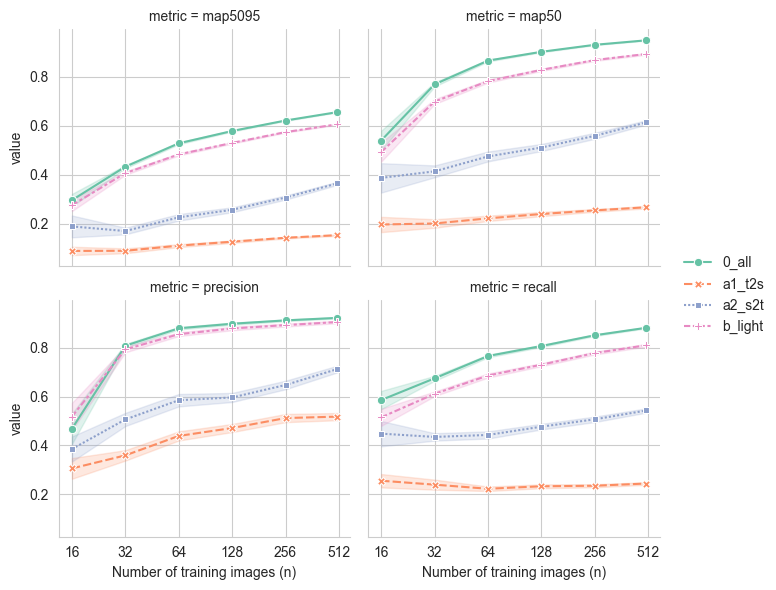

In [6]:
sns.set_style("whitegrid")
data_fig = data_long.\
    query("model == 'yolov9e'").\
    query('config in ["0_all", "a1_t2s", "a2_s2t", "b_light"]').\
    query('metric in ["map5095", "map50", "precision", "recall"]')

g = sns.FacetGrid(data_fig,
    col="metric",
    col_order=["map5095", "map50", "precision", "recall"],
    col_wrap=2,
    margin_titles=True,
    sharey="row",
)
g.map_dataframe(sns.lineplot, 
    x="n", y="value", 
    hue="config", style="config",
    hue_order=["0_all", "a1_t2s", "a2_s2t", "b_light"],
    style_order=["0_all", "a1_t2s", "a2_s2t", "b_light"],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
# title
# g.figure.suptitle("Model Generalization in each Data Configuration")
g.set(
    xscale="log",
    xticks=[2**i for i in range(4, 10)],
    xticklabels=[2**i for i in range(4, 10)],
    xlabel="Number of training images (n)",)
g.figure.subplots_adjust(right=1.2)
g.add_legend()
g.figure.set_size_inches(8, 6)
g.figure.savefig(os.path.join(file_out, "fig1_config.png"), dpi=300)

In [27]:
data_fig.loc[:, ["config", "n", "metric", "value"]].\
    groupby(["config", "n", "metric"]).\
    aggregate(["mean", "std"]).\
        reset_index().\
            to_csv(os.path.join(file_out, "fig1_config.csv"), 
                   index=False)
fig1_config = pd.read_csv(os.path.join(file_out, "fig1_config.csv"), header=[0, 1])
fig1_config

config                  n             metric     value  \
   Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1      mean   
0               0_all                 16              map50  0.539184   
1               0_all                 16            map5095  0.295653   
2               0_all                 16          precision  0.468318   
3               0_all                 16             recall  0.585624   
4               0_all                 32              map50  0.768806   
..                ...                ...                ...       ...   
91            b_light                256             recall  0.777641   
92            b_light                500              map50  0.892920   
93            b_light                500            map5095  0.605469   
94            b_light                500          precision  0.904259   
95            b_light                500             recall  0.809439   

              
         std  
0   0.144154  
1   0.091046  
2   0.222020  
3   0.133344  
4   0.031479  
..       ...  
91  0.021124  
92  0.011602  
93  0.006687  
94  0.017263  
95  0.018783  

[96 rows x 5 columns]

### Model sizes
| Model | Size |
| --- | --- |
|YOLOv8n|3.2M|
|YOLOv9c| 25.3M|
|YOLOv8m| 25.9M|
|YOLOv9e| 57.3M|
|YOLOv8x| 68.2M|

In [95]:
data_long.head(3)
data_long.model.unique()
data_long.\
    query("n == 500").\
    query("model in ['yolov8n', 'yolov8x', 'yolov9c', 'yolov9e']").\
    query('config in ["0_all"]')

,model,config,n,metric,value,ft,backbone,ver,params
1753,yolov9c,0_all,500,map5095,0.6461,False,yolov9c,v9,25.3
1759,yolov9e,0_all,500,map5095,0.6634,False,yolov9e,v9,57.3
1765,yolov8n,0_all,500,map5095,0.6341,False,yolov8n,v8,3.2
1777,yolov8x,0_all,500,map5095,0.6442,False,yolov8x,v8,68.2
1783,yolov9c,0_all,500,map5095,0.6511,False,yolov9c,v9,25.3
...,...,...,...,...,...,...,...,...,...
91100,yolov8n,0_all,500,n_fp,150.0000,False,yolov8n,v8,3.2
91112,yolov8x,0_all,500,n_fp,108.0000,False,yolov8x,v8,68.2
91118,yolov9c,0_all,500,n_fp,134.0000,False,yolov9c,v9,25.3
91124,yolov9e,0_all,500,n_fp,111.0000,False,yolov9e,v9,57.3


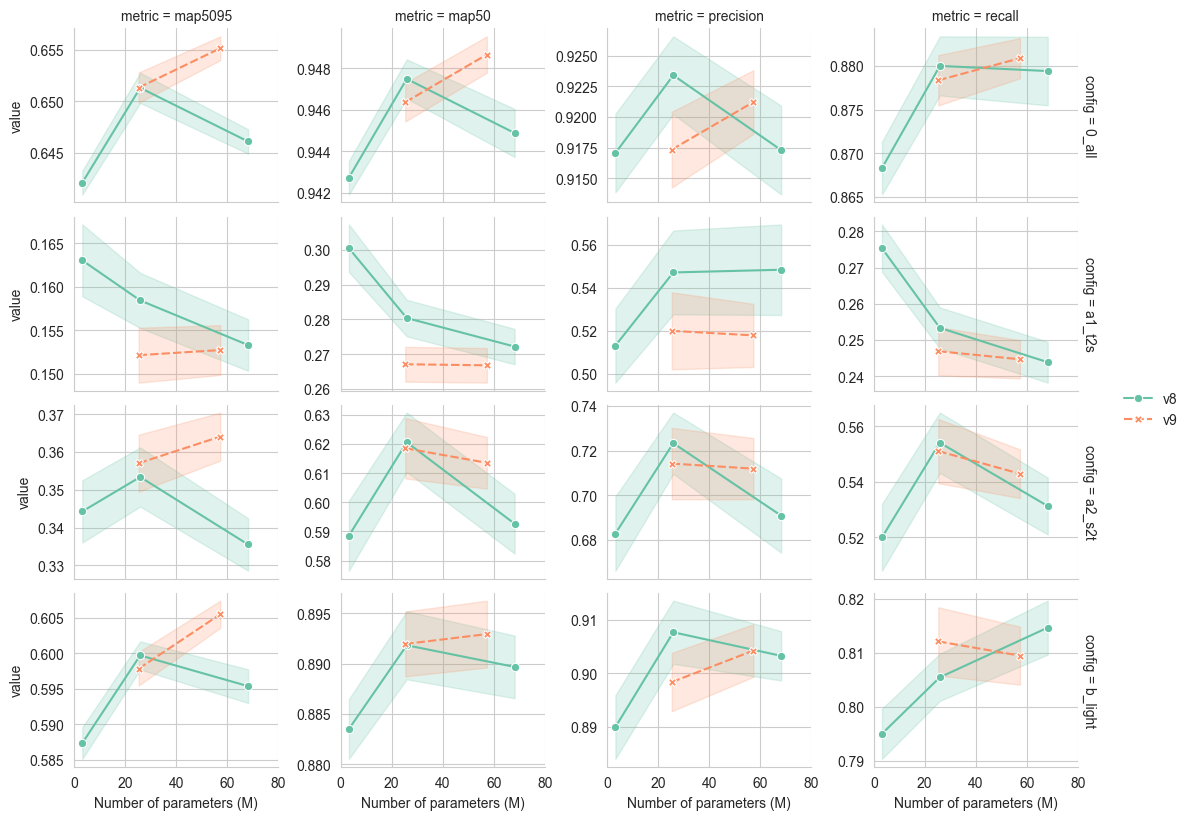

In [28]:
sns.set_style("whitegrid")
data_fig = data_long.\
    query("n == 500").\
    query("model in ['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e']").\
    query("metric in ['map5095', 'map50', 'precision', 'recall']").\
    query('config in ["0_all", "a1_t2s", "a2_s2t", "b_light"]')
g = sns.FacetGrid(data_fig,
    col="metric",
    col_order=["map5095", "map50", "precision", "recall"],
    row="config",
    row_order=["0_all", "a1_t2s", "a2_s2t", "b_light"],
    margin_titles=True,
    sharey=False,
)
g.map_dataframe(sns.lineplot,
    x="params", y="value",
    hue="ver", style="ver",
    hue_order=['v8', 'v9'],
    style_order=['v8', 'v9'],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
g.set(
    xticks=[i for i in range(0, 100, 20)],
    xticklabels=[i for i in range(0, 100, 20)],
    xlabel="Number of parameters (M)")
g.figure.subplots_adjust(right=1.2)
g.add_legend()
g.figure.set_size_inches(12, 8)
g.figure.savefig(os.path.join(file_out, "fig2_models.png"), dpi=300)

In [30]:
data_fig

,model,config,n,metric,value,ft,backbone,ver,params
5,yolov9c,b_light,500,map5095,0.6020,False,yolov9c,v9,25.3
11,yolov9e,b_light,500,map5095,0.6043,False,yolov9e,v9,57.3
17,yolov8n,b_light,500,map5095,0.5819,False,yolov8n,v8,3.2
23,yolov8m,b_light,500,map5095,0.5885,False,yolov8m,v8,25.9
29,yolov8x,b_light,500,map5095,0.5977,False,yolov8x,v8,68.2
...,...,...,...,...,...,...,...,...,...
47826,yolov9c,a2_s2t,500,recall,0.5322,False,yolov9c,v9,25.3
47832,yolov9e,a2_s2t,500,recall,0.5477,False,yolov9e,v9,57.3
47838,yolov8n,a2_s2t,500,recall,0.5432,False,yolov8n,v8,3.2
47844,yolov8m,a2_s2t,500,recall,0.5647,False,yolov8m,v8,25.9


In [32]:
data_fig.loc[:, ["model", "params", "config", "n", "metric", "value"]].\
    groupby(["config", "metric", "model"]).\
    aggregate(["mean", "std"]).\
        reset_index().\
            to_csv(os.path.join(file_out, "fig2_models.csv"), 
                   index=False)
fig2_models = pd.read_csv(os.path.join(file_out, "fig2_models.csv"), header=[0, 1])
fig2_models

config             metric              model params       \
   Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   mean  std   
0               0_all              map50            yolov8m   25.9  0.0   
1               0_all              map50            yolov8n    3.2  0.0   
2               0_all              map50            yolov8x   68.2  0.0   
3               0_all              map50            yolov9c   25.3  0.0   
4               0_all              map50            yolov9e   57.3  0.0   
..                ...                ...                ...    ...  ...   
75            b_light             recall            yolov8m   25.9  0.0   
76            b_light             recall            yolov8n    3.2  0.0   
77            b_light             recall            yolov8x   68.2  0.0   
78            b_light             recall            yolov9c   25.3  0.0   
79            b_light             recall            yolov9e   57.3  0.0   

        n          value            
     mean  std      mean       std  
0   500.0  0.0  0.947490  0.003300  
1   500.0  0.0  0.942732  0.002861  
2   500.0  0.0  0.944884  0.004048  
3   500.0  0.0  0.946365  0.003313  
4   500.0  0.0  0.948664  0.003090  
..    ...  ...       ...       ...  
75  500.0  0.0  0.805429  0.015268  
76  500.0  0.0  0.794973  0.016231  
77  500.0  0.0  0.814627  0.017453  
78  500.0  0.0  0.812069  0.022568  
79  500.0  0.0  0.809439  0.018783  

[80 rows x 9 columns]

## Objective 2: Fine-tuned performance comparison

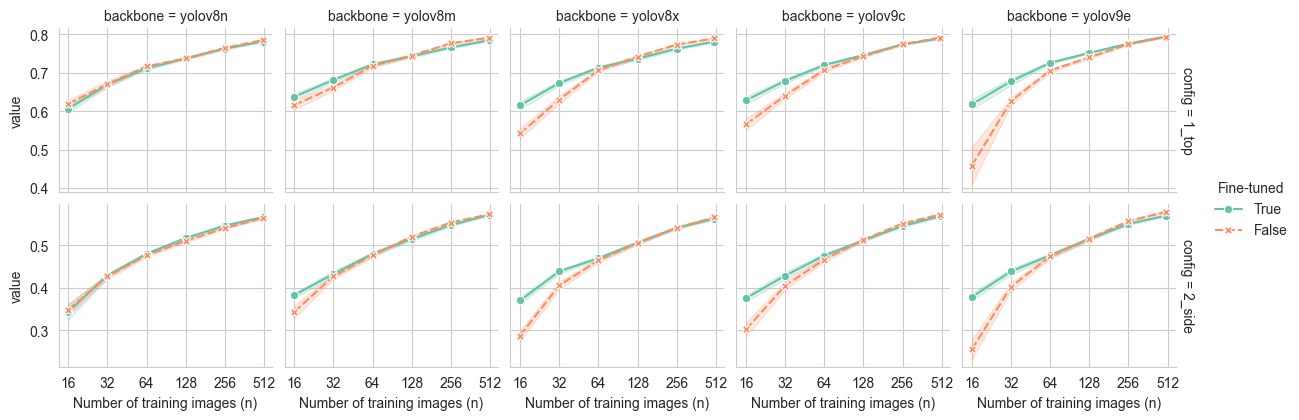

In [33]:
sns.set_style("whitegrid")
data_fig = data_long.\
    query("metric == 'map5095'").\
    query("config in ['1_top', '2_side']").\
    query("backbone in ['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e']")
g = sns.FacetGrid(data_fig,
    col="backbone",
    col_order=['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e'],
    row="config",
    row_order=["1_top", "2_side"],
    margin_titles=True,
    sharey="row",
)
g.map_dataframe(sns.lineplot,
    x="n", y="value",
    hue="ft", style="ft",
    hue_order=[True, False],
    style_order=[True, False],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
g.set(
    xscale="log",
    xticks=[2**i for i in range(4, 10)],
    xticklabels=[2**i for i in range(4, 10)],
    xlabel="Number of training images (n)",)
g.figure.subplots_adjust(right=1.2)
g.add_legend(title="Fine-tuned")
g.figure.set_size_inches(13, 4)
g.figure.savefig(os.path.join(file_out, "fig3_finetuned.png"), dpi=300)

In [34]:
data_fig.\
    groupby(["backbone", "config", "ft", "n"]).\
    aggregate(["mean", "std"]).\
        reset_index().\
            to_csv(os.path.join(file_out, "fig3_finetuned.csv"), 
                   index=False)

TypeError: agg function failed [how->mean,dtype->object]

## Objective 3: External evaluation

In [13]:
data_long.config.unique()
data_long.head(3)

,model,config,n,metric,value,ft,backbone,ver,params
0,yolov9c,b_light,16,map5095,0.3073,False,yolov9c,v9,25.3
1,yolov9c,b_light,32,map5095,0.4188,False,yolov9c,v9,25.3
2,yolov9c,b_light,64,map5095,0.5009,False,yolov9c,v9,25.3


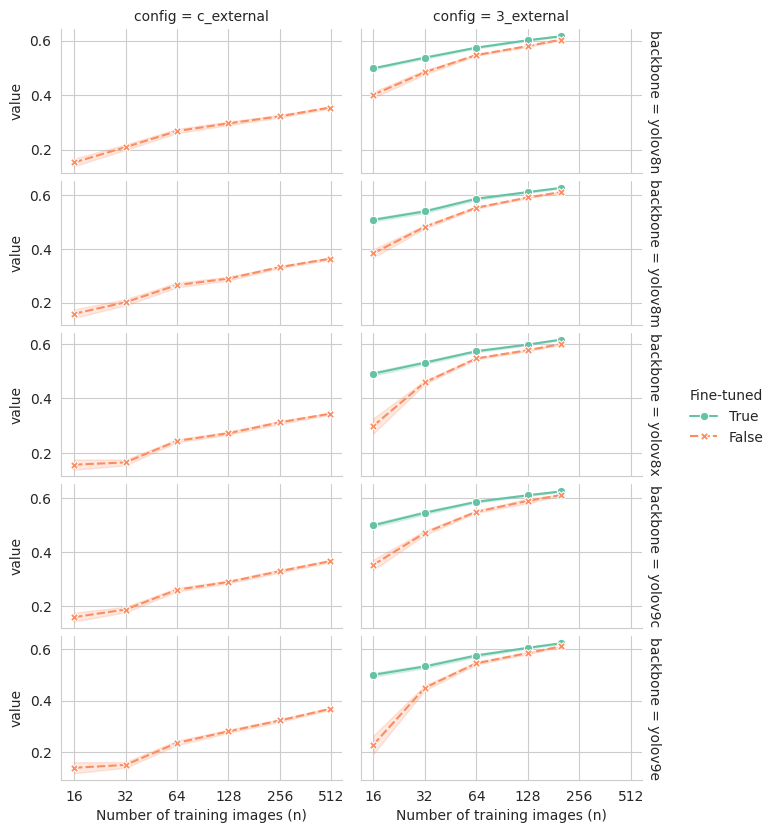

In [108]:
sns.set_style("whitegrid")
data_fig = data_long.\
    query("metric == 'map5095'").\
    query("backbone in ['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e']").\
    query('config in ["c_external", "3_external"]')

g = sns.FacetGrid(data_fig,
    row="backbone",
    row_order=['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e'],
    col="config",
    col_order=["c_external", "3_external"],
    margin_titles=True,
    sharey="row",
)
g.map_dataframe(sns.lineplot,
    x="n", y="value",
    hue="ft", style="ft",
    hue_order=[True, False],
    style_order=[True, False],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
g.set(
    xscale="log",
    xticks=[2**i for i in range(4, 10)],
    xticklabels=[2**i for i in range(4, 10)],
    xlabel="Number of training images (n)",)

g.figure.subplots_adjust(right=1.2)
g.add_legend(title="Fine-tuned")
g.figure.set_size_inches(8, 8)
g.figure.savefig(os.path.join(file_out, "fig4_external.png"), dpi=300)

In [109]:
data_fig.\
    groupby(["backbone", "config", "ft", "n"]).\
    aggregate(["mean", "std"]).\
        reset_index().\
            to_csv(os.path.join(file_out, "fig4_external.csv"), 
                   index=False)

/localscratch/ipykernel_50471/437207342.py:1: FutureWarning: ['model', 'metric', 'ver'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_fig.\


## Metric correlation

In [17]:
data.head(5)

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.3073,0.5695,0.7543,0.4954,0.5980,436,145,677,b_light,yolov9c,16
1,0.4188,0.7324,0.8092,0.6193,0.7016,436,122,138,b_light,yolov9c,32
2,0.5009,0.8019,0.8862,0.6995,0.7819,436,92,104,b_light,yolov9c,64
3,0.5605,0.8787,0.8753,0.7959,0.8337,436,90,45,b_light,yolov9c,128
4,0.5611,0.8663,0.9020,0.7602,0.8251,436,90,56,b_light,yolov9c,256


In [50]:
data.query("map5095 > 0.7").aggregate(["median"])

/localscratch/ipykernel_50471/1121964117.py:1: FutureWarning: ['config', 'model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.query("map5095 > 0.7").aggregate(["median"])


,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,n
median,0.7581,0.965,0.9726,0.9186,0.9447,451.0,30.0,21.0,256.0


In [110]:
data.query("map5095 > 0.6").aggregate(["median"])

/localscratch/ipykernel_50471/3970249590.py:1: FutureWarning: ['config', 'model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.query("map5095 > 0.6").aggregate(["median"])


,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,n
median,0.6557,0.9415,0.93665,0.8751,0.90045,451.0,43.0,53.0,200.0


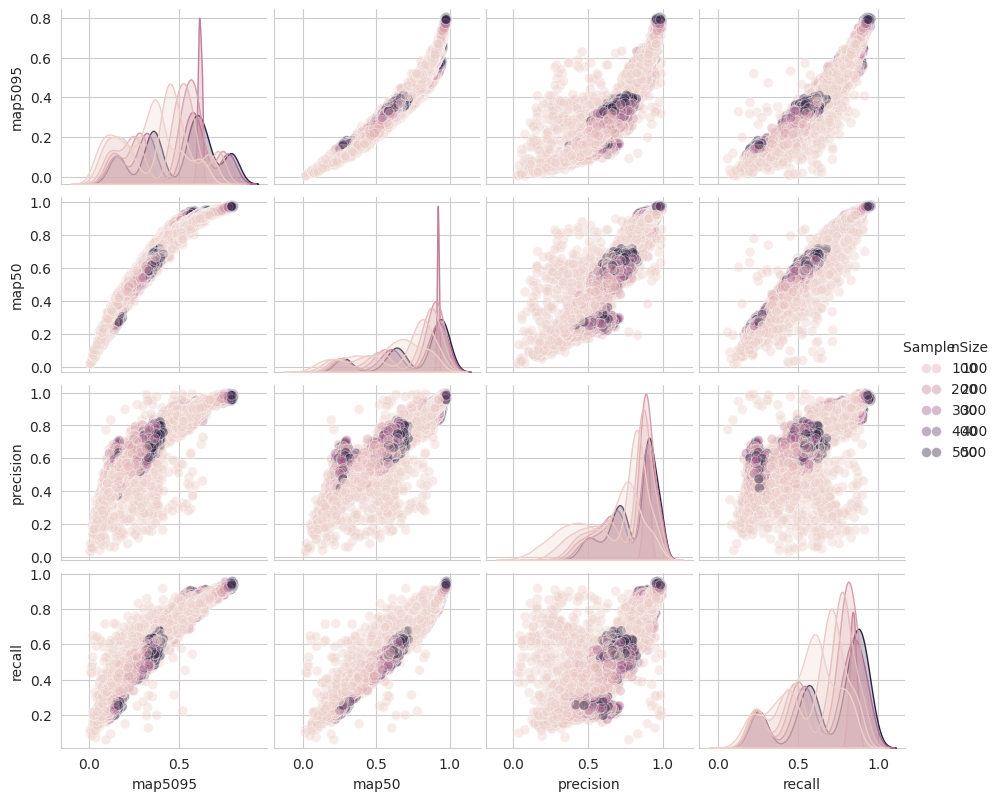

In [44]:
# sns.pairplot(data.loc[:, ["map5095", "map50", "precision", "recall", "config"]],
#              hue="config",
#             #  hue_order=[16, 32, 64, 128, 256, 500],
#              plot_kws={"s": 50, "alpha": 0.4},)
g = sns.pairplot(data.loc[:, ["map5095", "map50", "precision", "recall", "n"]],
             hue="n",
            #  hue_order=[16, 32, 64, 128, 256, 500],
             plot_kws={"s": 50, "alpha": 0.4},)
g.figure.set_size_inches(10, 8)
g.figure.savefig(os.path.join(file_out, "figs1_metrics.png"), dpi=300)

## Overall

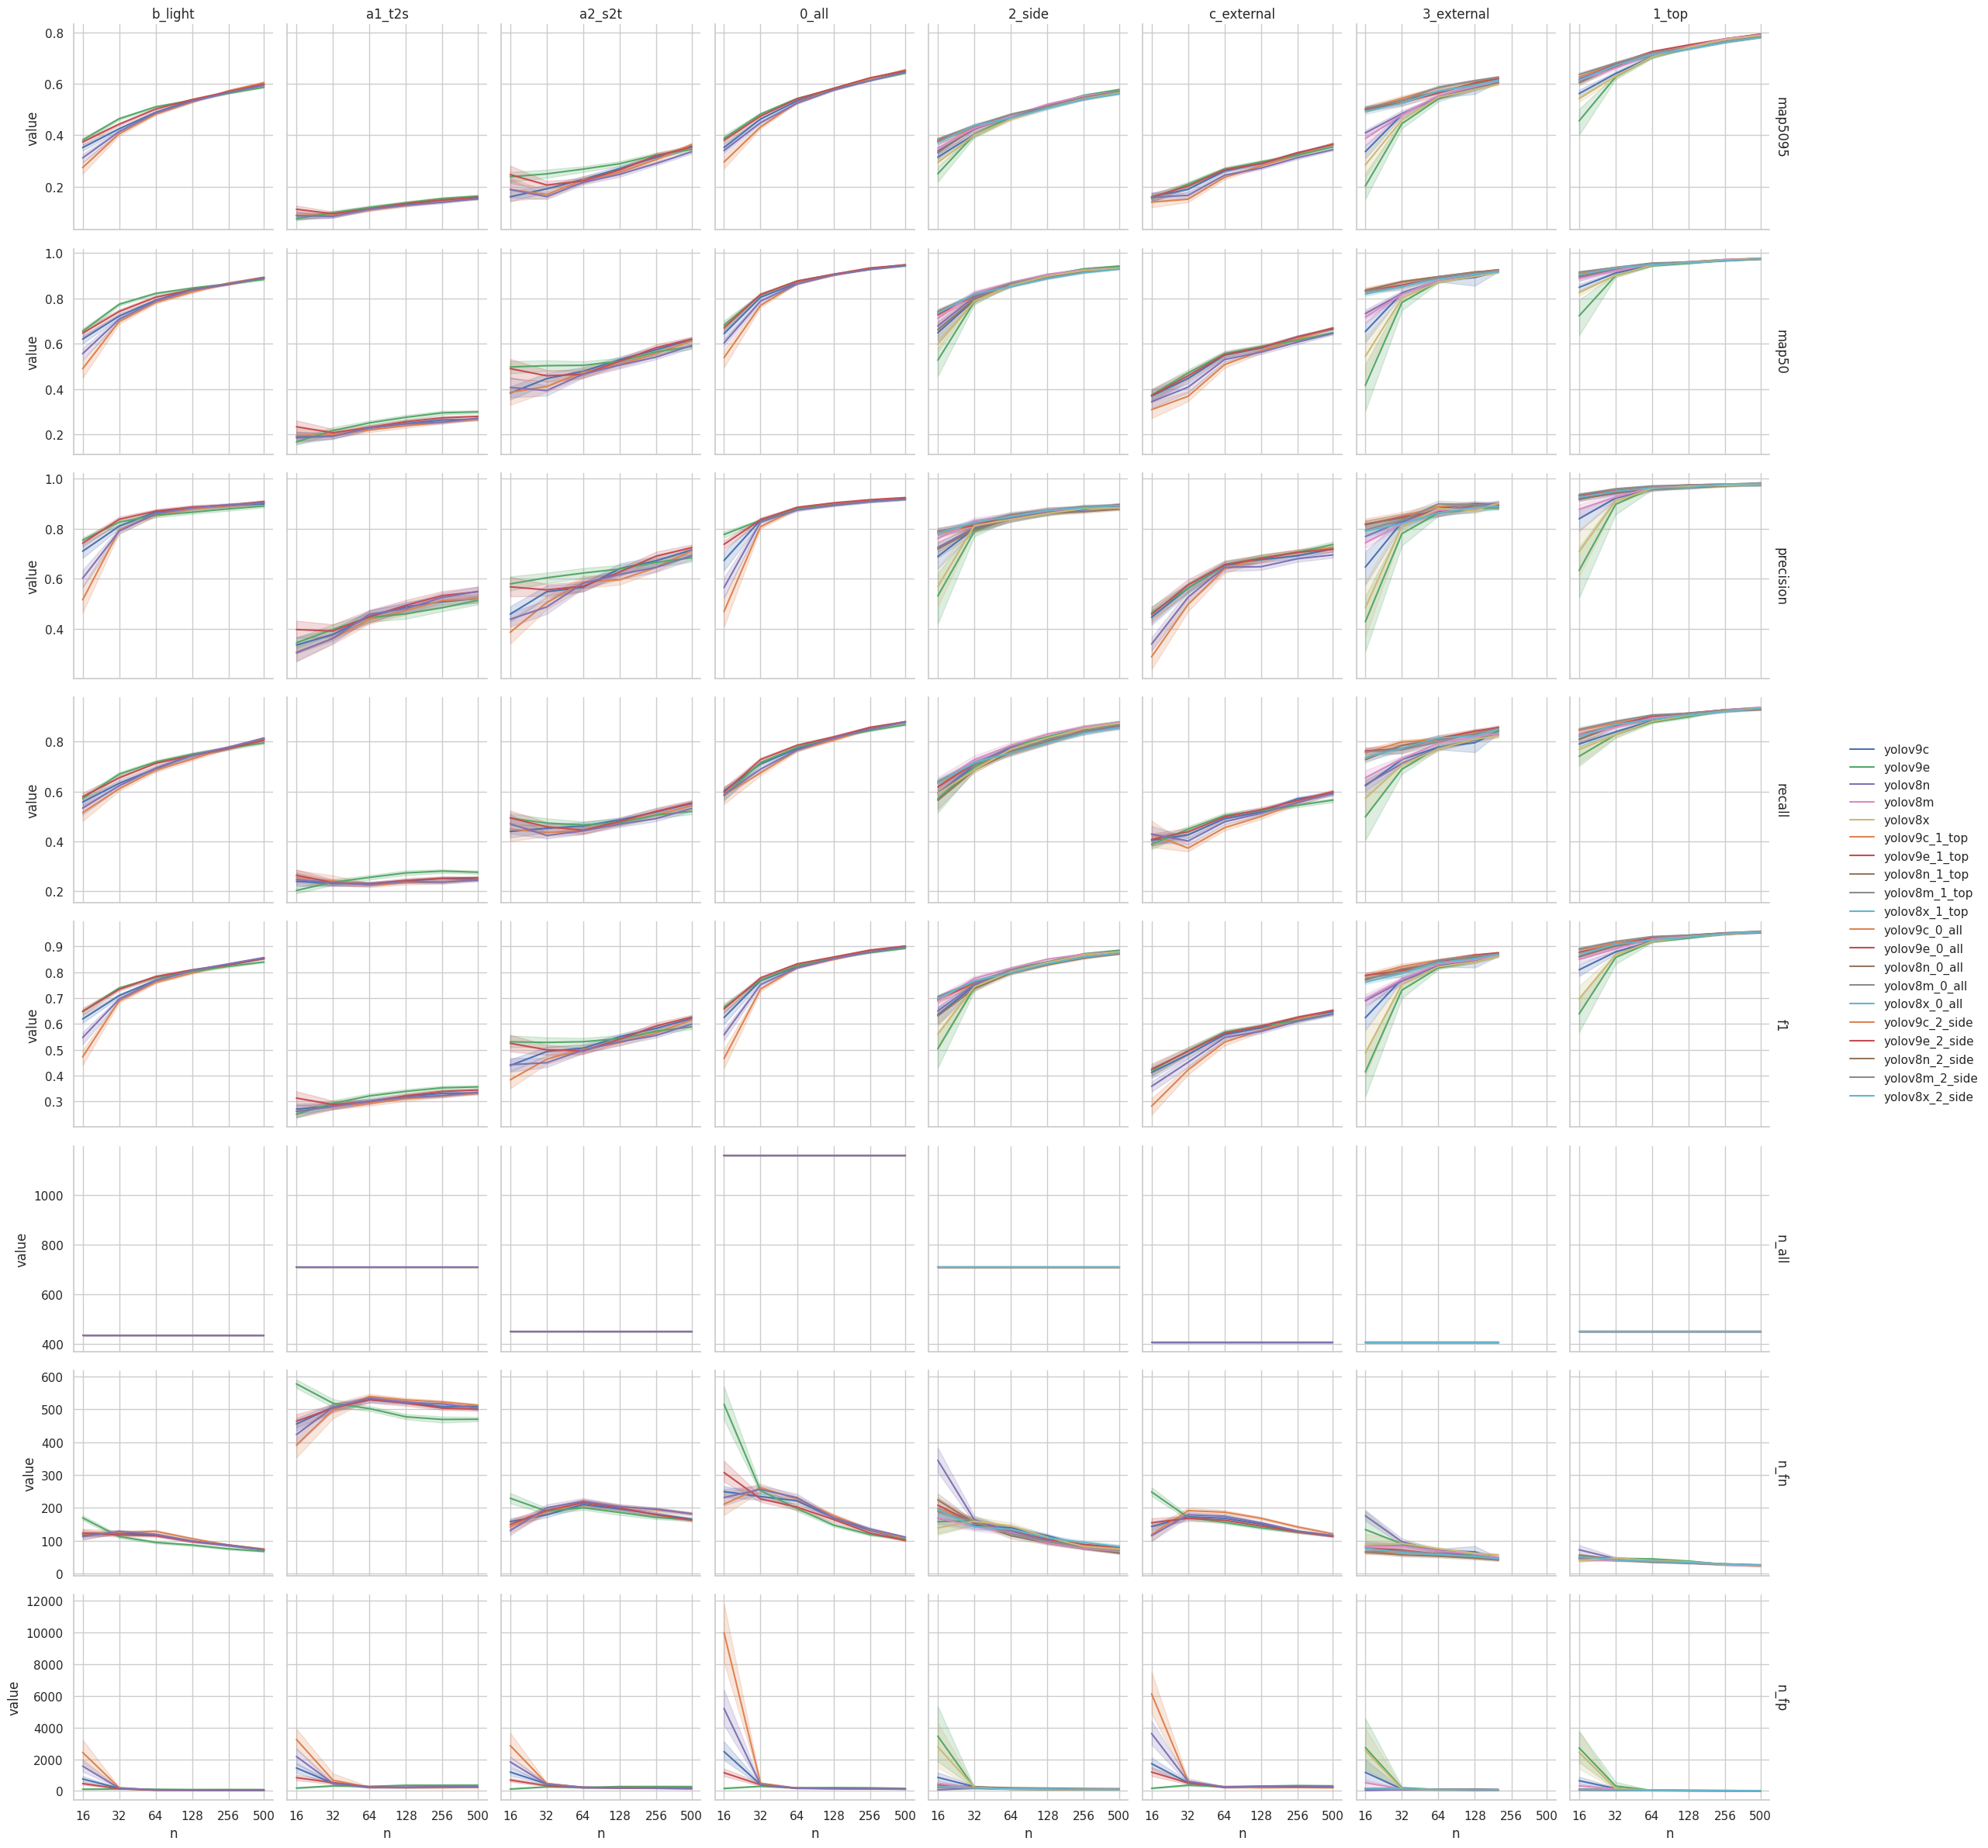

In [22]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
g.set(xscale="log")
g.set(xticks=[16, 32, 64, 128, 256, 500], 
      xticklabels=[16, 32, 64, 128, 256, 500])
plt.show()